<a href="https://colab.research.google.com/github/sukuzhanay/PySpark-and-BigData-Exploring-a-huge-dataset/blob/main/code_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1 - Install Spark, download datasets, create final dataframe. If you get an error regarding tar or wget, it is probably due to the Spark file being removed from the repository. Go to https://downloads.apache.org/spark/ and choose an equivalent version of Spark and Hadoop to download. So if 2.4.7 is not available, download the next version. At the time of this project creation, 2.4.7 exists.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

In [11]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark
findspark.init()
from google.colab import files
from pyspark.sql import SparkSession, Window
from pyspark.sql.functions import isnan, when, count, col, lit, trim, avg, ceil
from pyspark.sql.types import StringType
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
!wget https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv -O features.csv
!wget https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv -O labels.csv

--2020-12-20 20:00:50--  https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.43.70
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.43.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20069199 (19M) [text/csv]
Saving to: ‘features.csv’

features.csv        100%[===================>]  19.14M  17.2MB/s    in 1.1s    

2020-12-20 20:00:52 (17.2 MB/s) - ‘features.csv’ saved [20069199/20069199]

--2020-12-20 20:00:52--  https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.230.213
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.230.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148327 (1.1M) [text/csv]
Saving to: ‘labels.csv’

labels.csv          100%[===================>]   1.09M  2.12MB/s    in 0.5s    

2020-12-20 20:00:53 (2.1

In [10]:
!less labels.csv



id,status_group
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
9944,functional
19816,non functional
54551,non functional
53934,non functional
46144,functional
49056,functional
50409,functional
36957,functional
50495,functional
53752,functional
61848,functional
48451,non functional
58155,non functional
34169,functional needs repair
18274,functional
48375,functional
6091,functional
:^C


In [ ]:
!less features.csv


In [9]:
!ls 


features.csv  sample_data		 spark-2.4.7-bin-hadoop2.7.tgz
labels.csv    spark-2.4.7-bin-hadoop2.7


In [12]:
sc = SparkSession.builder.master("local[*]").getOrCreate()

In [13]:
feature = sc.read.csv("features.csv", inferSchema=True, header=True)

Task 2 - Change column type, drop duplicated rows, remove whitespacs. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [14]:
label = sc.read.csv("labels.csv", inferSchema=True, header=True)

In [16]:
print(feature.count())


59400


In [17]:
print(label.count())

59400


In [19]:
print(feature.columns)

['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [20]:
print(label.columns)

['id', 'status_group']


In [21]:
data = feature.join(label, on=("id"))

In [22]:
print(data.count())

59400


In [28]:
print(data.show())

+-----+----------+-------------------+--------------------+----------+--------------------+-----------+-------------------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------+----------------+--------------+----------+--------------+--------------------+-----------------+--------------------+------+-----------------+---------------+---------------------+---------------------+----------------+----------------+--------------------+------------+-------------+-------------+------------+--------------+--------------------+--------------------+------------+--------------------+---------------------+--------------------+
|   id|amount_tsh|      date_recorded|              funder|gps_height|           installer|  longitude|           latitude|            wpt_name|num_private|               basin|     subvillage|     region|region_code|district_code|             lga|          ward|population|public_meeting|         recorded_by|scheme_manag

In [23]:
print(data.columns)

['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


Task 2 - Change column type, drop duplicated rows, remove whitespacs. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.


In [31]:
print (data.printSchema())

root
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: timestamp (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: integer (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: integer (nullable = true)
 |-- district_code: integer (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: boolean (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: boolean (nullable = true)
 |-- construction_year: integer (nullable

In [36]:
data = data.withColumn('region_code', col('region_code').cast(StringType())).withColumn('district_code', col('district_code').cast(StringType()))

In [37]:
print(data.printSchema())

root
 |-- id: integer (nullable = true)
 |-- amount_tsh: double (nullable = true)
 |-- date_recorded: timestamp (nullable = true)
 |-- funder: string (nullable = true)
 |-- gps_height: integer (nullable = true)
 |-- installer: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- wpt_name: string (nullable = true)
 |-- num_private: integer (nullable = true)
 |-- basin: string (nullable = true)
 |-- subvillage: string (nullable = true)
 |-- region: string (nullable = true)
 |-- region_code: string (nullable = true)
 |-- district_code: string (nullable = true)
 |-- lga: string (nullable = true)
 |-- ward: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- public_meeting: boolean (nullable = true)
 |-- recorded_by: string (nullable = true)
 |-- scheme_management: string (nullable = true)
 |-- scheme_name: string (nullable = true)
 |-- permit: boolean (nullable = true)
 |-- construction_year: integer (nullable =

In [38]:
data = data.dropDuplicates(['id'])

In [39]:
data.count()

59400

In [41]:
str_cols = [item[0] for item in data.dtypes if item[1].startswith('string')]
for cols in str_cols:
  data = data.withColumn(cols, trim(data[cols]))

Task 3 - Remove columns with null values more than a threshold. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [46]:
data.select([count(when(isnan(c) | col(c).isNull(),c)).alias(c) for c in data.columns if c not in{'date_recorded','public_meeting', 'permit'}]).show()


+---+----------+------+----------+---------+---------+--------+--------+-----------+-----+----------+------+-----------+-------------+---+----+----------+-----------+-----------------+-----------+-----------------+---------------+---------------------+---------------------+----------+----------------+-------+------------+-------------+-------------+--------+--------------+------+-----------+------------+---------------+---------------------+------------+
| id|amount_tsh|funder|gps_height|installer|longitude|latitude|wpt_name|num_private|basin|subvillage|region|region_code|district_code|lga|ward|population|recorded_by|scheme_management|scheme_name|construction_year|extraction_type|extraction_type_group|extraction_type_class|management|management_group|payment|payment_type|water_quality|quality_group|quantity|quantity_group|source|source_type|source_class|waterpoint_type|waterpoint_type_group|status_group|
+---+----------+------+----------+---------+---------+--------+--------+----------

In [49]:
agg_row = data.select([(count(when(isnan(c) | col(c).isNull(),c))/data.count()).alias(c) for c in data.columns if c not in{'date_recorded','public_meeting', 'permit'}]).collect()


In [50]:
agg_dict_list =[row.asDict() for row in agg_row]


In [52]:
agg_dict = agg_dict_list[0]

In [56]:
col_null = list({i for i in agg_dict if agg_dict[i] >0.4})

In [57]:
print(agg_dict)

{'id': 0.0, 'amount_tsh': 0.0, 'funder': 0.0611952861952862, 'gps_height': 0.0, 'installer': 0.061531986531986535, 'longitude': 0.0, 'latitude': 0.0, 'wpt_name': 0.0, 'num_private': 0.0, 'basin': 0.0, 'subvillage': 0.0062457912457912455, 'region': 0.0, 'region_code': 0.0, 'district_code': 0.0, 'lga': 0.0, 'ward': 0.0, 'population': 0.0, 'recorded_by': 0.0, 'scheme_management': 0.06526936026936027, 'scheme_name': 0.4741750841750842, 'construction_year': 0.0, 'extraction_type': 0.0, 'extraction_type_group': 0.0, 'extraction_type_class': 0.0, 'management': 0.0, 'management_group': 0.0, 'payment': 0.0, 'payment_type': 0.0, 'water_quality': 0.0, 'quality_group': 0.0, 'quantity': 0.0, 'quantity_group': 0.0, 'source': 0.0, 'source_type': 0.0, 'source_class': 0.0, 'waterpoint_type': 0.0, 'waterpoint_type_group': 0.0, 'status_group': 0.0}


In [58]:
print(col_null)

['scheme_name']


In [62]:
data = data.drop(*col_null)

Task 4 - Group, aggregate, create pivot table. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [63]:
data.groupby('recorded_by').count().show()

+--------------------+-----+
|         recorded_by|count|
+--------------------+-----+
|GeoData Consultan...|59400|
+--------------------+-----+



In [64]:
data.groupBy('water_quality').count().orderBy('count',ascending=False).show()


+------------------+-----+
|     water_quality|count|
+------------------+-----+
|              soft|50818|
|             salty| 4856|
|           unknown| 1876|
|             milky|  804|
|          coloured|  490|
|   salty abandoned|  339|
|          fluoride|  200|
|fluoride abandoned|   17|
+------------------+-----+



In [67]:
data= data.drop('recorded_by')

In [68]:
data.groupBy('status_group').pivot('region').sum('amount_tsh').show()

+--------------------+---------+-------------+------+---------+------+--------+------------------+-------+--------+--------+-----+--------+-------+-------+---------+--------+---------+---------+--------+------+--------+
|        status_group|   Arusha|Dar es Salaam|Dodoma|   Iringa|Kagera|  Kigoma|       Kilimanjaro|  Lindi| Manyara|    Mara|Mbeya|Morogoro| Mtwara| Mwanza|    Pwani|   Rukwa|   Ruvuma|Shinyanga| Singida|Tabora|   Tanga|
+--------------------+---------+-------------+------+---------+------+--------+------------------+-------+--------+--------+-----+--------+-------+-------+---------+--------+---------+---------+--------+------+--------+
|functional needs ...|  10280.0|          0.0|   0.0| 118400.0|   0.0|270770.0|          129248.0| 3625.0| 71315.0|   900.0|  0.0| 70005.0|36240.0|10000.0|    520.0|292980.0| 125650.0|   2200.0|  6505.0|   0.0|  4310.0|
|          functional|1125485.0|     181175.0|   0.0|5515710.0|   0.0|530725.0|         746942.25|24560.0|312745.0| 9678

Task 5 - Convert categories with low frequency to Others, impute missing values. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [69]:
print(str_cols)

['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


In [76]:
for column in str_cols:
  print(data.groupBy(column).count().orderBy('count', ascending=False).show())
  values_cat = data.groupBy(column).count().collect()
  lessthan = [x[0] for x in values_cat if x [1] <1000]
  data = data.withColumn(column, when(col(column).isin(lessthan),'Others').otherwise(col(column)))
  data.groupby(column).count().orderBy('count', ascending=False).show()

+--------------------+-----+
|              funder|count|
+--------------------+-----+
|Government Of Tan...| 9084|
|                null| 3635|
|              Danida| 3114|
|              Hesawa| 2202|
|               Rwssp| 1374|
|          World Bank| 1349|
|                Kkkt| 1287|
|        World Vision| 1246|
|              Unicef| 1057|
|               Tasaf|  877|
|    District Council|  843|
|                 Dhv|  829|
|  Private Individual|  826|
|                Dwsp|  811|
|                   0|  777|
|               Norad|  765|
|     Germany Republi|  610|
|                Tcrs|  602|
|   Ministry Of Water|  590|
|               Water|  583|
+--------------------+-----+
only showing top 20 rows

None
+--------------------+-----+
|              funder|count|
+--------------------+-----+
|              Others|35052|
|Government Of Tan...| 9084|
|                null| 3635|
|              Danida| 3114|
|              Hesawa| 2202|
|               Rwssp| 1374|
|          W

AnalysisException: ignored

In [95]:
data.groupBy('population').count().orderBy('population').show()

+----------+-----+
|population|count|
+----------+-----+
|       2.0|    4|
|       3.0|    4|
|       4.0|   13|
|       5.0|   44|
|       6.0|   19|
|       7.0|    3|
|       8.0|   23|
|       9.0|   11|
|      10.0|  163|
|      11.0|    7|
|      12.0|   43|
|      13.0|   12|
|      14.0|   18|
|      15.0|  193|
|      16.0|    8|
|      17.0|    6|
|      18.0|   18|
|      19.0|    3|
|      20.0|  462|
|      21.0|    3|
+----------+-----+
only showing top 20 rows



In [97]:
data = data.withColumn('population', when(col('population')<2, lit(None)).otherwise(col('population')))
w = Window.partitionBy(data['district_code'])
data = data.withColumn('population', when(col('population').isNull(), avg(data['population']).over(w)).otherwise(col('population')))
data = data.withColumn('population', ceil(data['population']))
data.groupBy('population').count().orderBy('population').show()

+----------+-----+
|population|count|
+----------+-----+
|         2|    4|
|         3|    4|
|         4|   13|
|         5|   44|
|         6|   19|
|         7|    3|
|         8|   23|
|         9|   11|
|        10|  163|
|        11|    7|
|        12|   43|
|        13|   12|
|        14|   18|
|        15|  193|
|        16|    8|
|        17|    6|
|        18|   18|
|        19|    3|
|        20|  462|
|        21|    3|
+----------+-----+
only showing top 20 rows



Task 6 - Make visualizations. If you are disconnected, please run the previous cells by clicking on this cell, going to Runtime, then clicking Run before.

In [120]:
color_status = {'functional': 'green', 'non functional': 'red', 'functional needs repair': 'blue'}

In [121]:
cols = ['status_group','payment_type', 'longitude','latitude', 'gps_height']

In [122]:
df= data.select(cols).toPandas()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

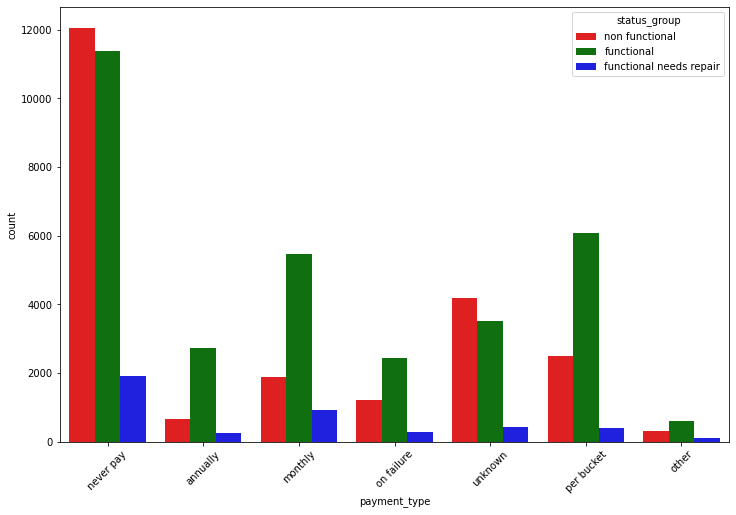

In [125]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x='payment_type',hue='status_group',data=df, ax=ax,palette=color_status)
plt.xticks(rotation=45)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

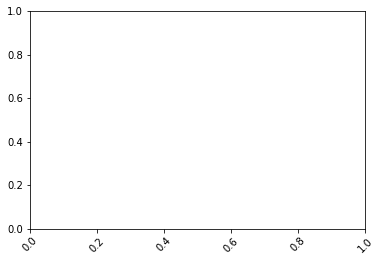

In [117]:
sns.countplot(x='payment_type',hue='status_group',data=df, ax=ax,palette=color_status)
plt.xticks(rotation=45)
